In [122]:
import numpy as np
import pandas as pd


In [123]:
#import data 
review_train = pd.read_csv('D:\ADML\ProjectC\ATML2024_reviews_train.csv')
business = pd.read_csv('D:\ADML\ProjectC\ATML2024_businesses.csv')
user = pd.read_csv('D:\ADML\ProjectC\ATML2024_users.csv')
philadelphia = pd.read_excel('D:\ADML\ProjectC\PHILADELPHIA.xlsx')


In [124]:
#select data
philadelphia.rename(columns={'ZIP Code 5':'postal_code'}, inplace=True)
postalcode1 = philadelphia['postal_code']
business = business.astype({'postal_code':'string'})
#remove NaN in 'postal_code'
business = business[business['postal_code'].notna()]
postalcode1 = postalcode1.astype({'postal_code':'string'})
business = business.merge(postalcode1, how = "inner", on = "postal_code")


Due to cities in Philadelphia have different names, we use postal code to select companies in Philadelphia. 

In [125]:
business = business.astype({'categories':'string'})
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,attributes,categories,hours
0,wm9eoqjytVbC7dQcM4WSTM,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,QmIpD0PlnaCsD-xjDQdYYW,J Sushi,243 S 10th St,Philadelphia,PA,19107,39.947033,-75.157434,"{'Ambience': ""{'touristy': False, 'hipster': F...","Seafood, Restaurants, Sushi Bars, Japanese","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22..."
2,A-QaLeUiqr64ZC3_j1rLNa,Chinatown Market Shoe Repair And Tailor,143 N 11th St,Philadelphia,PA,19107,39.955127,-75.157442,{'BusinessAcceptsCreditCards': 'False'},"Shoe Repair, Sewing & Alterations, Local Services",NaN
3,AW_fmr9AJjbxeQd_5UFc_i,Marcie Blaine,108 S 13th St,Philadelphia,PA,19107,39.950036,-75.162158,"{'BusinessParking': ""{'garage': False, 'street...","Desserts, Specialty Food, Food, Chocolatiers &...",NaN
4,w32oFBZjl-OUkcI9G1Evgn,Mumbai Bistro,930 Locust St,Philadelphia,PA,19107,39.947207,-75.157252,"{'RestaurantsReservations': 'False', 'OutdoorS...","Indian, Restaurants","{'Tuesday': '11:30-21:0', 'Wednesday': '11:30-..."


In [126]:
#select restaurants in Philadelphia
import nltk
#remove punctuation
remove_char = ',.?!'
busy = business.reset_index(drop = True)
busy = busy[busy['categories'].notna()]
busy = busy.reset_index(drop = True)
Busy=[]
for i in range(len(busy)):
    temp = busy["categories"].iloc[i]
    for j in remove_char:
        temp = temp.replace("\n","")
        temp = temp.replace(j,"")
        busy_taken = nltk.word_tokenize(temp)
    Busy.append(busy_taken)

In [127]:
a=[]
#select restaurants and fillter some bars that have restaurants supplies.
for i in range(len(Busy)):
    if 'Restaurants' in Busy[i] and 'supplies' not in Busy[i]:
        a.append(i)

b = busy.iloc[a,:]
b = b.reset_index(drop = True)


In [128]:
resto_reviews_philly = review_train.merge(b, how = "inner", on = "business_id")


After we get all the restaurants in Philadelphia, we need to select the reviews of restaurants in Philadelphia by 'business_id'.

In [129]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [130]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [131]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

In [132]:
cleaned_data = [remove_stopwords(review) for review in resto_reviews_philly['text']]
processed_data = [preprocess(review) for review in cleaned_data]
processed_data[0:5]

[['one',
  'favorite',
  'place',
  'grab',
  'quick',
  'bit',
  'eat',
  'location',
  'airport',
  'stadium',
  'crab',
  'fry',
  'one',
  'amazing',
  'thing',
  'ever',
  'try',
  'wiz',
  'litteraly',
  'liquid',
  'gold',
  'sure',
  'buy',
  'extra',
  'one',
  'beware',
  'food',
  'menu',
  'typically',
  'greasy',
  'bar',
  'food',
  'stick',
  'crab',
  'fry',
  'golden'],
 ['crab',
  'nacho',
  'appetizer',
  'crab',
  'meat',
  'pepper',
  'arugula',
  'aioli',
  'use',
  'aioli',
  'tangy',
  'flavor',
  'aioli',
  'gave',
  'nacho',
  'unique',
  'taste',
  'quite',
  'still',
  'good',
  'crabfries',
  'chickie',
  'pete',
  'famous',
  'crabfries',
  'honestly',
  'seasoned',
  'fry',
  'nothing',
  'crab',
  'however',
  'fry',
  'seasoned',
  'well',
  'cheese',
  'sauce',
  'great',
  'single',
  'piece',
  'crab',
  'meat',
  'pretty',
  'good',
  'fry',
  'ultimate',
  'tailgate',
  'burger',
  'burger',
  'highlight',
  'meal',
  'cheeseburger',
  'topped',
  

We remove the stopwords and lemmatize the word in reviews to prepare the model fitting. In this quetion, we don't have pre-trained model about food, service... So we choose to use LDA model to find the topics of revioews.

In [133]:
#LDA topics model fitting
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=42, passes=15)

In [134]:
print(lda_model.print_topics())

[(0, '0.015*"food" + 0.013*"good" + 0.009*"chicken" + 0.009*"great" + 0.008*"restaurant" + 0.008*"dish" + 0.008*"place" + 0.008*"delicious" + 0.007*"sauce" + 0.006*"ordered"'), (1, '0.016*"good" + 0.015*"place" + 0.012*"pizza" + 0.010*"great" + 0.010*"food" + 0.009*"cheese" + 0.009*"sandwich" + 0.008*"like" + 0.008*"get" + 0.007*"best"'), (2, '0.017*"food" + 0.012*"place" + 0.011*"time" + 0.009*"order" + 0.008*"service" + 0.007*"one" + 0.007*"get" + 0.007*"would" + 0.007*"like" + 0.007*"u"')]


Type 0: We can see that the first several weights are related to food.\
Type 1: We can see that the first several weights are related to place and food.\
Type 2: We can see that the first several weights are related to food and service.




In [135]:
#fit the reviews and get the topics
topics = lda_model.get_document_topics(corpus)

In [136]:
resto_reviews_philly.insert(resto_reviews_philly.shape[1],'topics',topics)

In [137]:
#Find the most likely type of reviews
Topics=[]
for i in range(len(topics)):
    temp = 0
    z=0
    for j in range(len(resto_reviews_philly['topics'][i])):
        if temp <= resto_reviews_philly['topics'][i][j][1]:
            temp = resto_reviews_philly['topics'][i][j][1]
            z=j
    Topics.append(z)

In [138]:
resto_reviews_philly.insert(resto_reviews_philly.shape[1],'Topics',Topics)

In [139]:
pd.value_counts(Topics)

0    40892
1    40210
2    22188
Name: count, dtype: int64

In [140]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'total reviews')

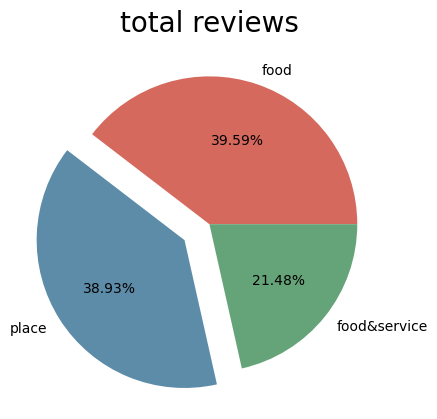

In [141]:
values = [40892,40210,22188]
labels = ['food','place','food&service']
plt.pie(values, labels=labels, autopct='%1.2f%%', colors=["#d5695d", "#5d8ca8", "#65a479"],explode=(0, 0.2, 0))
plt.title('total reviews',size=20)

In this plot, we will find that consumers pay more attention to the quality of food and the location of the restaurant. Some consumers care about both the quality of food and the service of restaurants.

In [142]:
pd.value_counts(resto_reviews_philly['business_id'])

business_id
whsT5jRfJeKjh3bUOqnyty    888
Q6Lw_Pu45UJcLZxVaBB3PP    624
wE98iGuzIPgO7UIThjxZP9    511
gWSLQh8nFQ4nEHzcit2YkI    504
wm9tA7zfYionj6vDZ4hlGA    465
                         ... 
QHuIpHVQAUuEi3HlWCukp1      1
g2Nx-cuS_h-VCRvguXsILC      1
gAR-GSkvNCvZuZHtdkVtFc      1
wNEk_Hso-jByARHIvbs_RK      1
A7w6UR4wkkC5aQ1fY459Pq      1
Name: count, Length: 5434, dtype: int64

In [143]:
restaurant1 = resto_reviews_philly[resto_reviews_philly['business_id']=='whsT5jRfJeKjh3bUOqnyty']
restaurant1.head()

,id,user_id,business_id,rating,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,attributes,categories,hours,topics,Topics
7096,811,Qhd6j1ivy5Zh9u7blWGk11,whsT5jRfJeKjh3bUOqnyty,4,0,0,0,I love going to Reading Terminal. My only comp...,2013-05-08 16:45:21,Reading Terminal Market,...,Philadelphia,PA,19107,39.953341,-75.158855,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...","[(0, 0.06774172), (1, 0.7702951), (2, 0.161963...",1
7097,818,APMzddSWqZzuHzz8z2fv9Y,whsT5jRfJeKjh3bUOqnyty,5,0,0,0,"Visiting from NYC, definitely enjoyed the vibe...",2016-04-04 02:50:38,Reading Terminal Market,...,Philadelphia,PA,19107,39.953341,-75.158855,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...","[(0, 0.013818411), (1, 0.79804915), (2, 0.1881...",1
7098,4548,AhXLgVE6-7foy69WFdKwLm,whsT5jRfJeKjh3bUOqnyty,5,8,1,2,The Reading Terminal Market is absolutely fant...,2006-10-24 20:23:14,Reading Terminal Market,...,Philadelphia,PA,19107,39.953341,-75.158855,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...","[(0, 0.17805243), (1, 0.8163989)]",1
7099,4649,wse4bXjOne-Y56w1TP1rFO,whsT5jRfJeKjh3bUOqnyty,4,0,0,0,Can you say WOW! A Foodies paradise! Made me w...,2012-08-13 09:56:31,Reading Terminal Market,...,Philadelphia,PA,19107,39.953341,-75.158855,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...","[(0, 0.12530228), (1, 0.5958313), (2, 0.278866...",1
7100,4987,QSR9daorxvSEGgTITfykT8,whsT5jRfJeKjh3bUOqnyty,5,0,0,0,GO. Eat. Repeat. Buy stuff to take home. Eat. ...,2019-01-27 11:12:53,Reading Terminal Market,...,Philadelphia,PA,19107,39.953341,-75.158855,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...","[(0, 0.127384), (1, 0.37601483), (2, 0.49660122)]",2


In [144]:
pd.value_counts(restaurant1['Topics'])

Topics
1    659
0    126
2    103
Name: count, dtype: int64

Text(0.5, 1.0, 'Reading Terminal Market(Fast food)')

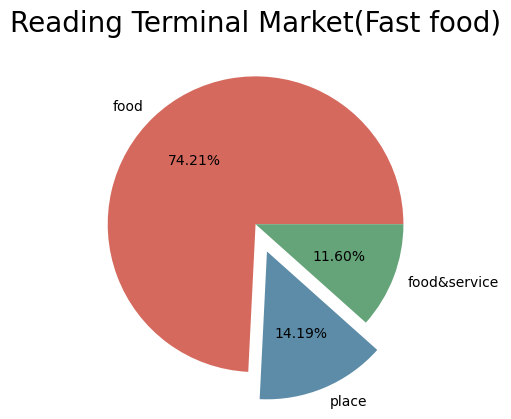

In [145]:
values = [659,126,103]
labels = ['food','place','food&service']
plt.pie(values, labels=labels, autopct='%1.2f%%',  colors=["#d5695d", "#5d8ca8", "#65a479"],explode=(0, 0.2, 0))
plt.title('Reading Terminal Market(Fast food)',size=20)

In [146]:
restaurant2 = resto_reviews_philly[resto_reviews_philly['business_id']=='Q6Lw_Pu45UJcLZxVaBB3PP']
restaurant2.head()

,id,user_id,business_id,rating,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,attributes,categories,hours,topics,Topics
19155,2608,w0d8h_lBYFc2d8a0rgzDxb,Q6Lw_Pu45UJcLZxVaBB3PP,2,1,1,0,Eh...I just don't get it! \nI've oficially now...,2017-05-22 19:05:30,Pat's King of Steaks,...,Philadelphia,PA,19147,39.933201,-75.159266,"{'RestaurantsReservations': 'False', 'Corkage'...","Italian, American (Traditional), Sandwiches, F...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...","[(1, 0.7169627), (2, 0.2792571)]",0
19156,4538,A8YtIbECGg1-hIcpmjzdGy,Q6Lw_Pu45UJcLZxVaBB3PP,4,1,0,0,After many years of doing business in Phily an...,2013-01-28 21:12:35,Pat's King of Steaks,...,Philadelphia,PA,19147,39.933201,-75.159266,"{'RestaurantsReservations': 'False', 'Corkage'...","Italian, American (Traditional), Sandwiches, F...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...","[(0, 0.094839156), (1, 0.5853285), (2, 0.31983...",1
19157,11852,AM-hvbjdpwbYpTcCqEOpXL,Q6Lw_Pu45UJcLZxVaBB3PP,2,4,1,1,A day trip calls for a Philly Cheese Steak que...,2017-10-31 17:01:09,Pat's King of Steaks,...,Philadelphia,PA,19147,39.933201,-75.159266,"{'RestaurantsReservations': 'False', 'Corkage'...","Italian, American (Traditional), Sandwiches, F...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...","[(1, 0.92668873), (2, 0.069837496)]",0
19158,18976,w1fjmG811f4Pb4TZT2roKa,Q6Lw_Pu45UJcLZxVaBB3PP,3,0,0,0,Drove way outta my way to eat at the famous ki...,2013-03-02 23:45:47,Pat's King of Steaks,...,Philadelphia,PA,19147,39.933201,-75.159266,"{'RestaurantsReservations': 'False', 'Corkage'...","Italian, American (Traditional), Sandwiches, F...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...","[(1, 0.48269087), (2, 0.5129786)]",1
19159,19556,w80Z38SNXRgMtC-N1jRZxT,Q6Lw_Pu45UJcLZxVaBB3PP,3,0,0,1,I definitely like pats over Geno's any day but...,2016-08-25 03:04:58,Pat's King of Steaks,...,Philadelphia,PA,19147,39.933201,-75.159266,"{'RestaurantsReservations': 'False', 'Corkage'...","Italian, American (Traditional), Sandwiches, F...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...","[(0, 0.018053506), (1, 0.96356803), (2, 0.0183...",1


In [147]:
pd.value_counts(restaurant2['Topics'])

Topics
1    384
0    200
2     40
Name: count, dtype: int64

Text(0.5, 1.0, 'Pats King of Steaks(Italian, American (Traditional))')

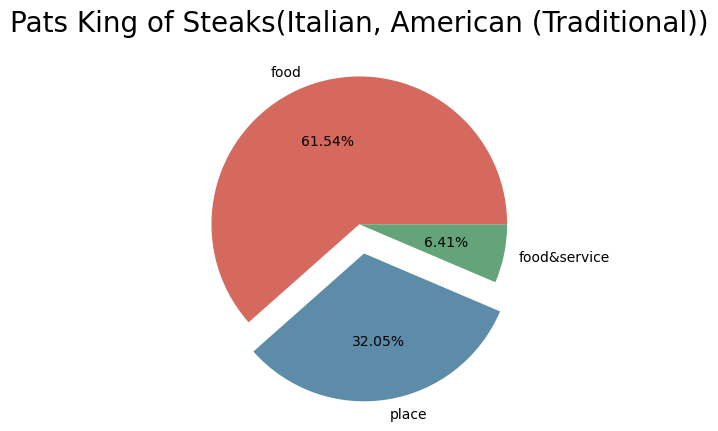

In [148]:
values = [384,200,40]
labels = ['food','place','food&service']
plt.pie(values, labels=labels, autopct='%1.2f%%',  colors=["#d5695d", "#5d8ca8", "#65a479"],explode=(0, 0.2, 0))
plt.title('Pats King of Steaks(Italian, American (Traditional))',size=20)

In [149]:
restaurant3 = resto_reviews_philly[resto_reviews_philly['business_id']=='wE98iGuzIPgO7UIThjxZP9']
restaurant3.head()

,id,user_id,business_id,rating,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,attributes,categories,hours,topics,Topics
5291,639,wgVE2Jcw7pVcwSQDN2BFue,wE98iGuzIPgO7UIThjxZP9,4,0,0,0,Don't overlook this place!!!! I did once. ...,2014-01-04 00:55:40,El Vez,...,Philadelphia,PA,19107,39.949702,-75.16177,"{'RestaurantsReservations': 'True', 'BYOBCorka...","Lounges, Bars, Nightlife, Breakfast & Brunch, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...","[(0, 0.44639635), (1, 0.011338489), (2, 0.5422...",2
5292,820,gRtlcz3tFH2caFOuLbkBWk,wE98iGuzIPgO7UIThjxZP9,3,0,0,0,My friend and I went for dinner tonight. The s...,2017-01-09 05:39:55,El Vez,...,Philadelphia,PA,19107,39.949702,-75.16177,"{'RestaurantsReservations': 'True', 'BYOBCorka...","Lounges, Bars, Nightlife, Breakfast & Brunch, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...","[(2, 0.9820843)]",0
5293,1419,AHOb2o7HoY-i5FU534bB2_,wE98iGuzIPgO7UIThjxZP9,5,0,0,0,My girlfriend and I were visiting from out of ...,2019-06-15 03:33:58,El Vez,...,Philadelphia,PA,19107,39.949702,-75.16177,"{'RestaurantsReservations': 'True', 'BYOBCorka...","Lounges, Bars, Nightlife, Breakfast & Brunch, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...","[(1, 0.10281705), (2, 0.8901485)]",1
5294,2534,g-qPksLpGETyXqMtsAOkXo,wE98iGuzIPgO7UIThjxZP9,4,0,0,0,This place looks like good mixture of American...,2017-11-11 20:43:15,El Vez,...,Philadelphia,PA,19107,39.949702,-75.16177,"{'RestaurantsReservations': 'True', 'BYOBCorka...","Lounges, Bars, Nightlife, Breakfast & Brunch, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...","[(0, 0.016784327), (1, 0.59180903), (2, 0.3914...",1
5295,5935,AcPa588kvFuDy-GAtU02vO,wE98iGuzIPgO7UIThjxZP9,5,0,0,0,Can you say the best blood orange margaritas e...,2011-11-26 14:03:42,El Vez,...,Philadelphia,PA,19107,39.949702,-75.16177,"{'RestaurantsReservations': 'True', 'BYOBCorka...","Lounges, Bars, Nightlife, Breakfast & Brunch, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...","[(0, 0.03524729), (1, 0.93241096), (2, 0.03234...",1


In [150]:
pd.value_counts(restaurant3['Topics'])

Topics
1    271
2    142
0     98
Name: count, dtype: int64

Text(0.5, 1.0, 'El Vez(Nightlife, Breakfast & Brunch)')

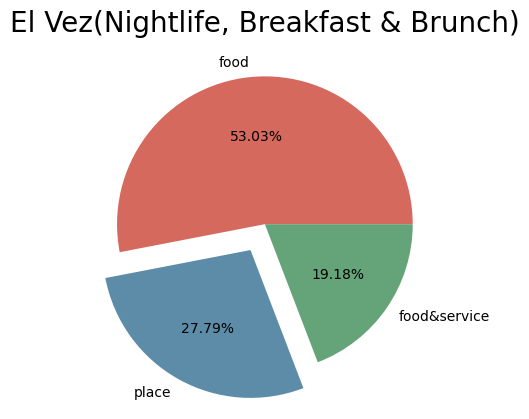

In [151]:
values = [271,142,98]
labels = ['food','place','food&service']
plt.pie(values, labels=labels, autopct='%1.2f%%',  colors=["#d5695d", "#5d8ca8", "#65a479"],explode=(0, 0.2, 0))
plt.title('El Vez(Nightlife, Breakfast & Brunch)',size=20)

In [158]:
type0 = resto_reviews_philly[(resto_reviews_philly['Topics']==0)&(resto_reviews_philly['rating']>=4)]
type0['text'][47]

'I was in earlier tonight with my friend and my son for a mushroom & swiss burger which was great and cooked perfectly. The food is always great, but the exceptional part this time was our waitress, Katrina. She was very attentive but most of all she was wonderful and very patient with my son, who is a bit of a talker. We had a great time and will be back again soon.'

In [153]:
type1 = resto_reviews_philly[(resto_reviews_philly['Topics']==1)&(resto_reviews_philly['rating']>=4)]
type1['text'][0]

'One of my favorite places to grab a quick bit to eat. I have only been to locations in the airport and stadiums. \n\nThe crab fries are one of the most amazing things you will ever try. The wiz is litteraly liquid gold (be sure to buy an extra one). \n\nBeware of the other food on the menu... it is typically just greasy bar food. Stick to the crab fries and you will be golden!'

In [154]:
type2 = resto_reviews_philly[(resto_reviews_philly['Topics']==2)&(resto_reviews_philly['rating']>=4)]
type2['text'][13]

"Not your average sports bar, especially when their's a 100 inch screen in the middle of the place. It's located in some strip mall right off the highway, their's other stores there but the entire parking lot is for Chickie's. My friend and I came here after the Knick's got their ass kicked by the 76'ers. The wait we were told was 45 mins or so they sent me a text to my phone for a way to track my seating, in less than 20 mins I was ready. I feel a lot of restaurants may try to add extra time to the wait list just to make it less crowded and or give the employees a breather. \n\nI ordered the crab fries right away, to only be disappointed real fast, its just old bay seasoning on crinkled fries, not a big deal. Had they put crab meat with old bay with melted cheese, then we're talking! We both ordered crab legs cause apparently their seasoning is different which it was! I don't know what type of spice it was but you can definitely tell the difference between old bay and whatever they us

In this sevreal graphs, we can see the distribution of reviews for the top three restaurants. The consumers appear to be most interested in food quality. For different types of restaurants, consumers have different priorities for food quality, service, and location. 


Based on LDA model, we can find that type0 reviews cares more about food quality like delicious chicken, type1 reviews are close to some fast food reviews like pizza and sandwitch which consumers cares convenient location more important than food quality, type2 reviews shows that consumers cares service like Reservable, good service, saving time and food quality.

And we choose some reviews from the three type to check whether they are following corresponding type.

type0:{I was in earlier tonight with my friend and my son for a mushroom & swiss burger which was great and cooked perfectly. The food is always great, but the exceptional part this time was our waitress, Katrina. She was very attentive but most of all she was wonderful and very patient with my son, who is a bit of a talker. We had a great time and will be back again soon.}\

type1:{One of my favorite places to grab a quick bit to eat. I have only been to locations in the airport and stadiums.\n\nThe crab fries are one of the most amazing things you will ever try. The wiz is litteraly liquid gold (be sure to buy an extra one). Beware of the other food on the menu... it is typically just greasy bar food. Stick to the crab fries and you will be golden!}\

type2:{Not your average sports bar, especially when their's a 100 inch screen in the middle of the place. It's located in some strip mall right off the highway, their's other stores there but the entire parking lot is for Chickie's. My friend and I came here after the Knick's got their ass kicked by the 76'ers. The wait we were told was 45 mins or so they sent me a text to my phone for a way to track my seating, in less than 20 mins I was ready. I feel a lot of restaurants may try to add extra time to the wait list just to make it less crowded and or give the employees a breather. \n\nI ordered the crab fries right away, to only be disappointed real fast, its just old bay seasoning on crinkled fries, not a big deal. Had they put crab meat with old bay with melted cheese, then we're talking! We both ordered crab legs cause apparently their seasoning is different which it was! I don't know what type of spice it was but you can definitely tell the difference between old bay and whatever they used, it had a nice kick to it. The menu said a pound and a quarter per order but I felt it may have been less or maybe I was just too hungry. \n\nTheir's a lot of stuff on the menu that I want to try next time. Its def the second place you visit in Philly after you get yourself a cheese-steak!}